<a href="https://colab.research.google.com/github/gabriela-regueira/Python_Practicing/blob/main/Cancer_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
from IPython import display


In [4]:
uploaded = files.upload()

Saving agulha.jpg to agulha.jpg
Saving benigmalig.png to benigmalig.png
Saving cancer_mama.PNG to cancer_mama.PNG
Saving kernel_svm.png to kernel_svm.png


# Classificando câncer de mama com SVM (Support Vector Machine)
**Contexto**

De acordo com o Instituto Nacional do Câncer, de todos os casos de câncer detectados em mulheres no Brasil, 29,5% são câncer de mama.
Infelizmente, 72% das detecções são feitas já em estado avançado, o que dificulta o tratamento.
O diagnóstico pode ser realizado através da mamografia, uma ressonância magnética que identifica o nódulo, e em seguida uma biópsia que identifica as características do nódulo a fim de determinar o tipo do tumor: malígno ou benigno.

Em termos gerais, o tumor malígno tende a ser disforme e denso, apresentando contornos não muito bem definidos.


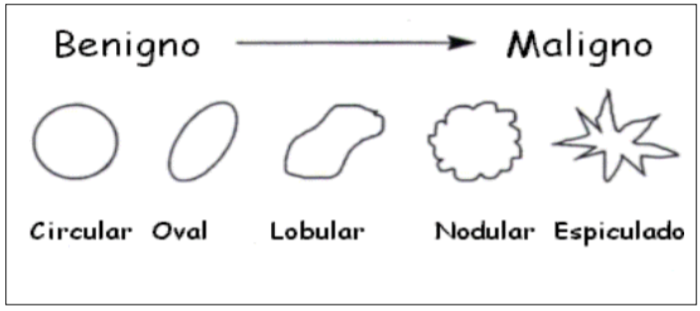

In [46]:
display.Image("cancer_mama.PNG", width=400)



**Cenário para estudo**

Utilizaremos o dataset da Universidade de Wisconsin, que está disponível na biblioteca do Scikit Learn. Os atributos deste dataset são calculados a partir da imagem digitalizada de biópsias realizadas através do procedimento de Aspiração por Agulha Fina.

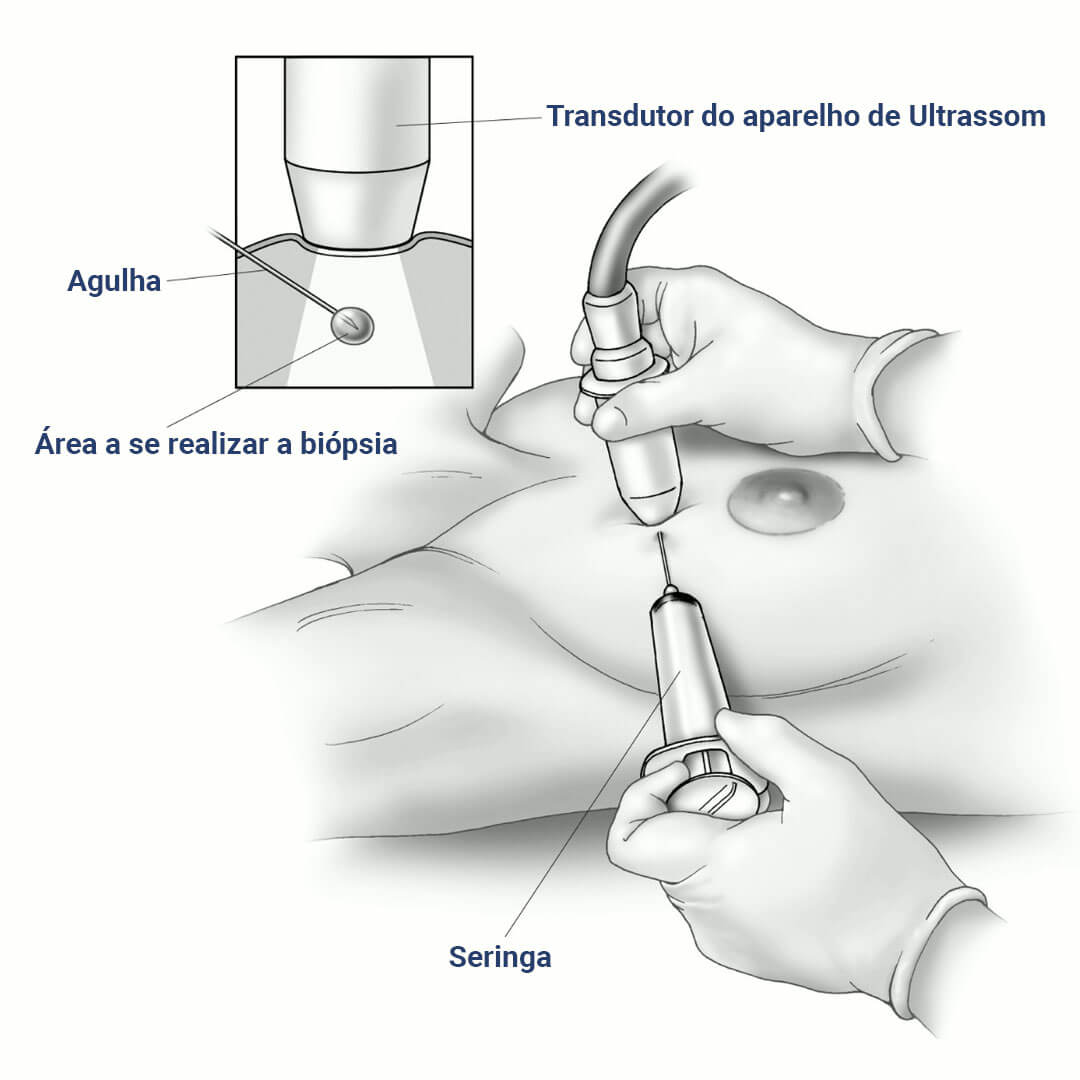

In [47]:
display.Image("agulha.jpg", width=400)

Esses atributos descrevem as características dos núcleos celulares presentes na imagem. 

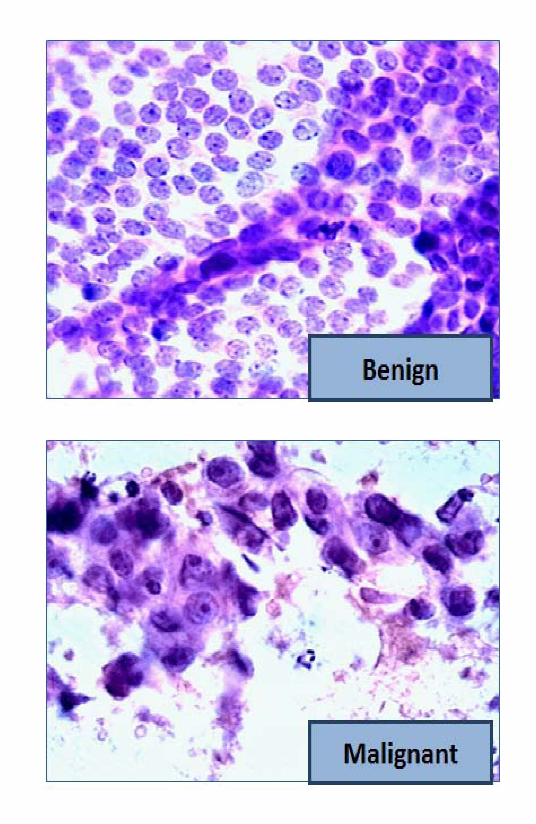

In [48]:
display.Image("benigmalig.png", width = 250)

Faremos o modelo de previsão para categorizar o tumor da mama em benigno ou maligno, utilizando o método SVM de classificação.


**Descrição do Dataset**

Temos **10 características** da imagem do tumor:  

1.   Raio: média das distâncias do centro à margem
2.   Textura: desvio padrão dos valores da escala de cinza
3. Perímetro
4. Área
5. Maciez: variação local nos comprimentos dos raios
6. Densidade: quadrado do perímetro, dividido pela área, menos 1
7. Concavidade: gravidade das porções concavas do contorno
8. Pontos côncavos: número de porções concavas do contorno
9. Simetria
10. Dimensão fractal: aproximação do litoral -1

- Para cada uma dessas características, temos 3 medidas numéricas:

1.   Média
2.   Erro padrão
3.  Maior valor (média dos 3 maiores valores)



- Resultando num total de **30 atributos numéricos** e 1 variável target;
- Apenas **569 linhas**;
- Não existem **dados nulos**;
- **Distribuição** da classe: 37% maligno; 63% benigno;


**Importanto bibliotecas e carregando dados**


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()


In [49]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
df_cancer = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [50]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Análise exploratória dos dados**

Relacionando apenas os atributos de média, podemos ver uma clara separação entre as classes. Sendo assim, a utilização do algoritmo de Support Vector Machine é indicada, a fim de fornecer previsões mais eficientes neste cenário.

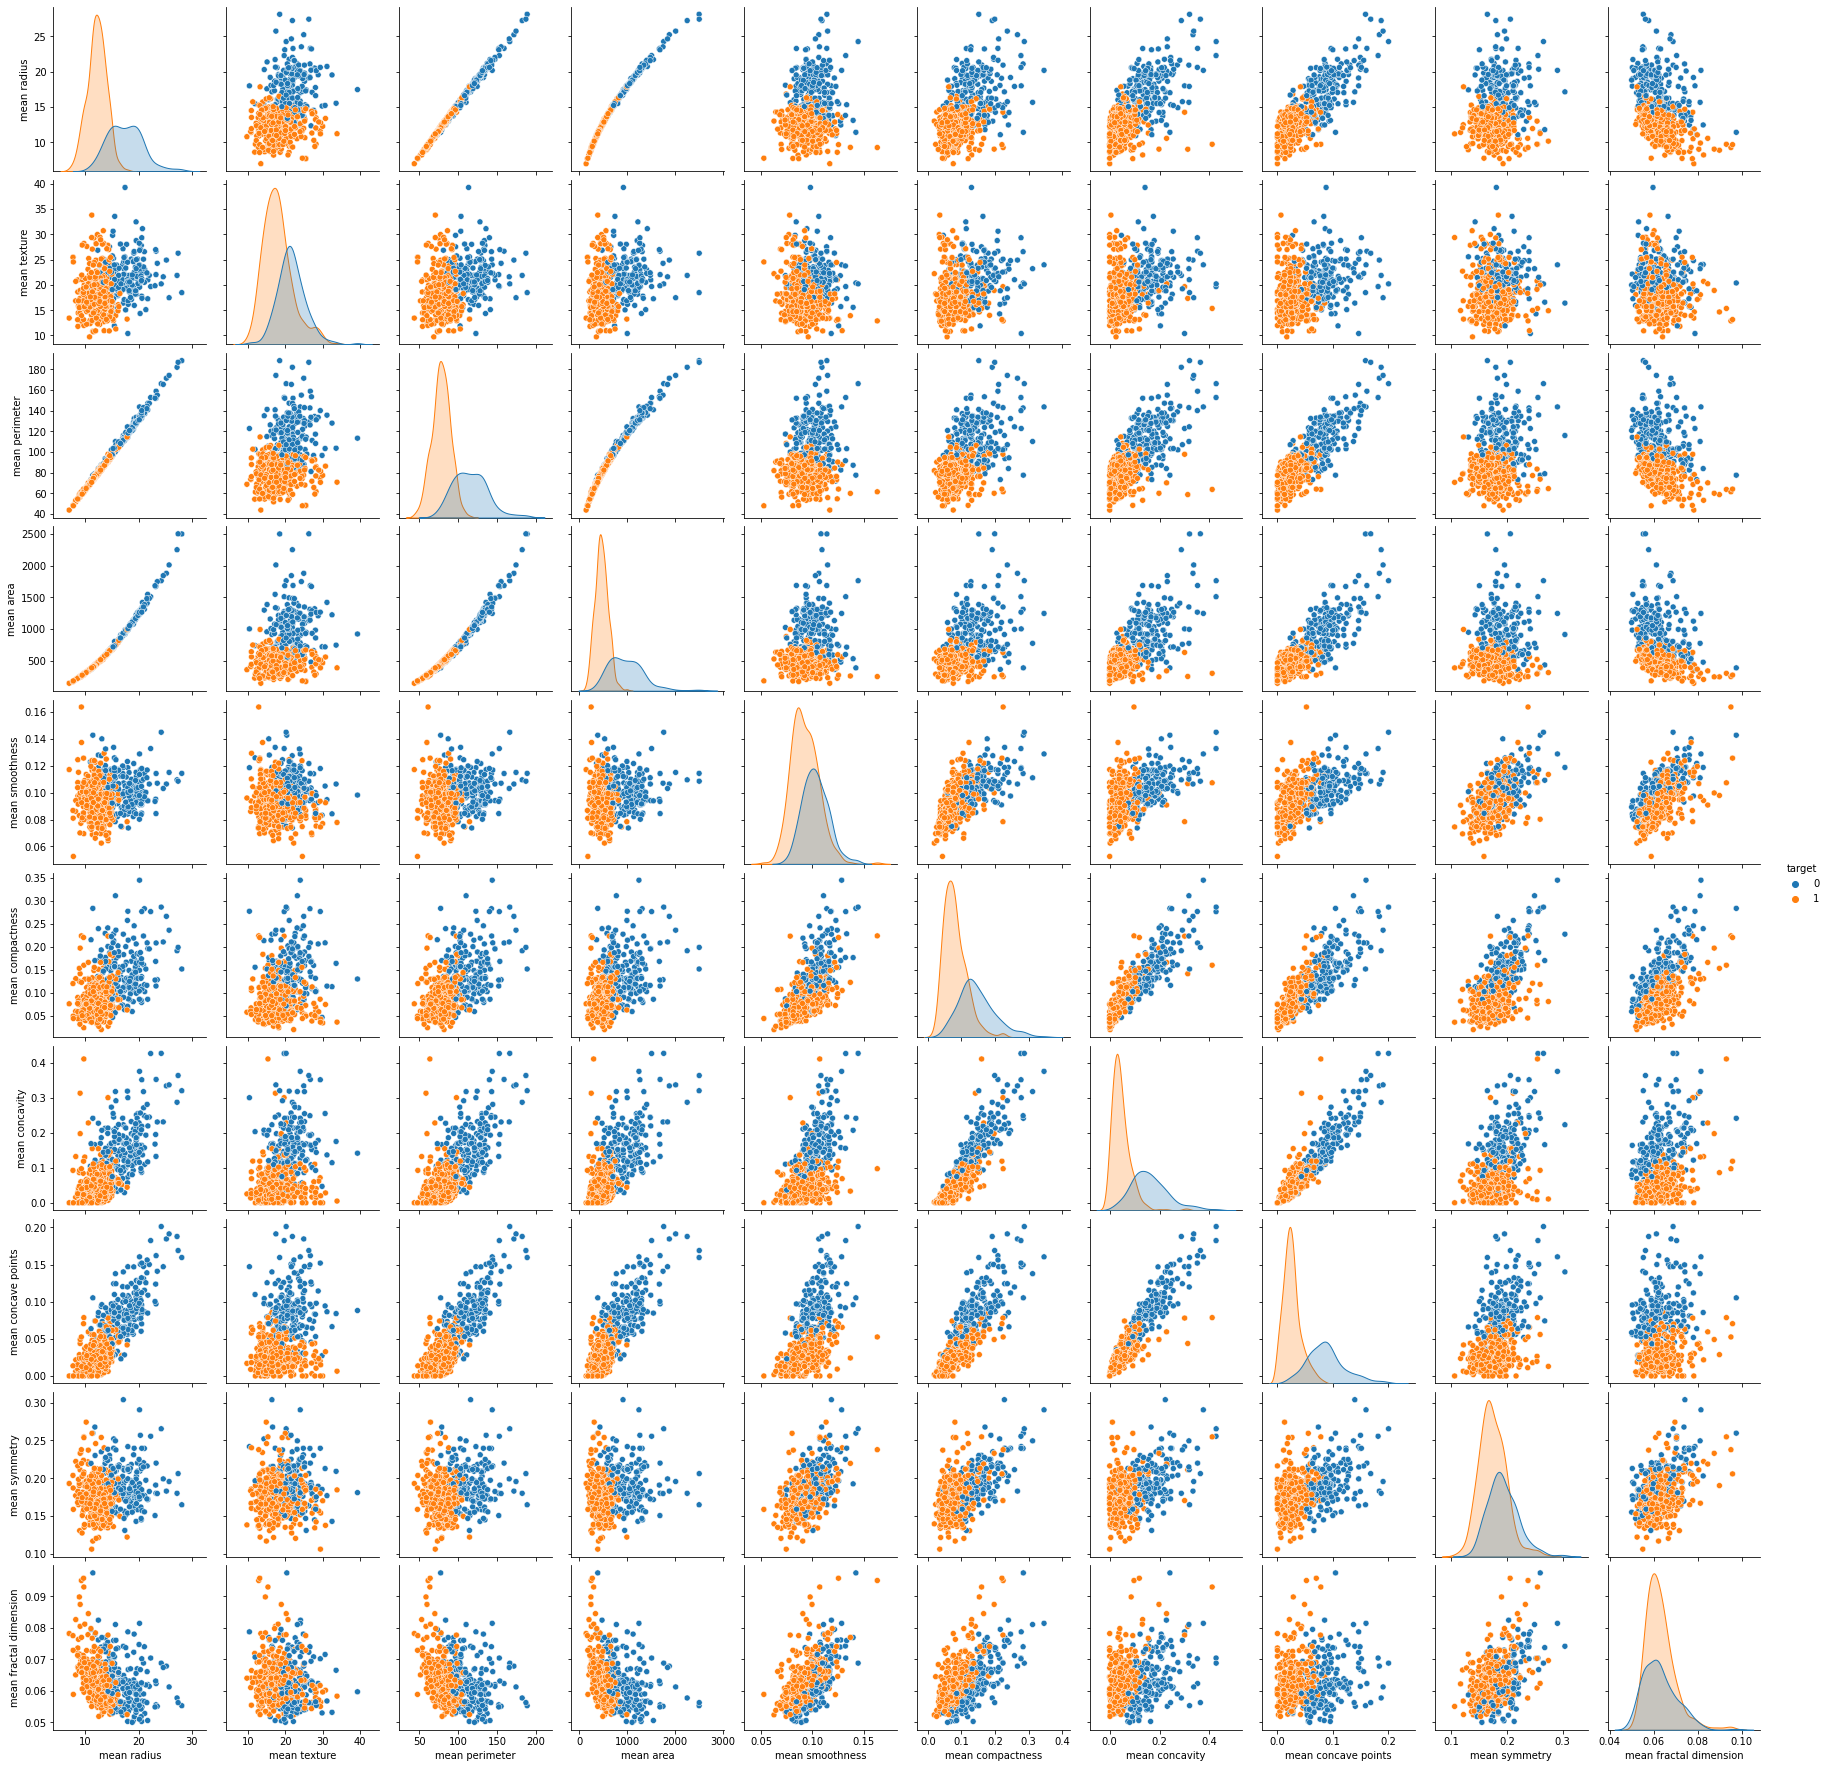

In [7]:
df_mean =df_cancer[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']]
df_target = pd.DataFrame(cancer['target'], columns=['target'])
df_mean_t = pd.concat([df_mean, df_target], axis=1)
sns.pairplot(df_mean_t, hue='target')

**Separando dataset de treino e de teste**

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_cancer
y = cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Treinando o Modelo**

In [10]:
from sklearn.svm import SVC

In [11]:
model = SVC()

In [12]:
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Algumas considerações sobre o método SVC dentro do SVM**

O algoritmo SVC tem basicamente 4 funções centrais possíveis, são elas:
- Linear
- RBF (Radius Basis Function)
- Polinomial
- Sigmoidal

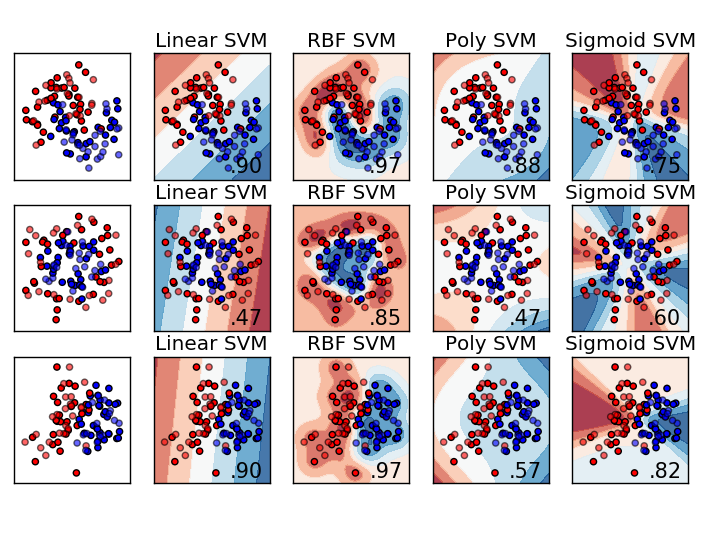

In [4]:
display.Image("kernel_svm.png", width=500)

Considerando a distribuição dos dados, para o dataset em questão utilizaremos a função RBF. Esta função é impactada por 2 parâmetros principais:
- C : indica a margem usada para tomada de decisão de classificação. Quanto maior o C, menor a margem, fazendo com que o modelo determine com maior assertividade as classificações.
- gamma: indica o quão longe do limite de decisão eu considerarei a influência de cada ponto. Para um gamma pequeno, o modelo levará em consideração pontos mais afastados do limite de decisão. Sendo assim,  quanto maior o gamma, mais preciso o limite, pois irá considerar apenas raios pequenos, que indicam pontos mais próximos.

A função usa como padrão C=1.0 e gamma='scale', que significa 1 dividido pelo número de atributos vezes a variância da população. (1/(n_features*X.var()))


**Testando e Analisando o Modelo**

In [20]:
predictions = model.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, target_names=cancer['target_names']))

[[ 56  10]
 [  3 102]]
              precision    recall  f1-score   support

   malignant       0.95      0.85      0.90        66
      benign       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



A **acurácia** do modelo foi de 92%. O que significa que 92% dos dados foram classificados corretamente.

Dos 8% classificados erroneamente, tivemos 6% de falsos negativos e 2% de falsos positivos.

Visto que as classes não estavam totalmente balanceadas (tínhamos 37% maligno e 63% benigno), a acurácia sozinha não é a melhor métrica para analisar o desempenho do modelo.

O **f1-score** faz uma média harmônica entre precisão e *recall* (revocação). E neste caso, tivemos um desempenho satisfatório em ambas as métricas.

Entretanto, no caso do diagnóstico de um câncer, a prioridade é eliminar os falsos negativos (FN) pois, para uma paciente doente, o diagnóstico tardio pode comprometer significativamente as chances de reversão da doença. Sendo assim, a medida prioritária de desempenho é o **recall**. Quanto maior o recall, menos falsos negativos serão previstos.

**Como podemos aumentar o *recall*?**

Vamos testar outros valores de C e gamma para o SVC

In [40]:
from sklearn.model_selection import GridSearchCV


In [41]:
param = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.0001, 0.001, 0.01, 0.1, 1]}

In [42]:
grid = GridSearchCV(SVC(), param, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.887, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.938, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.963, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.962, total=   0.0s
[CV] C=0.1, gamma=0.0001 .............................................
[CV] ................. C=0.1, gamma=0.0001, score=0.886, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.01, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.633, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.637, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
grid_predictions = grid.predict(X_test)

In [44]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[ 59   7]
 [  4 101]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [45]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

Notamos então que o método GridSearch manteve o C = 1, e alterou o gamma para 0.0001. Aumentando o recall de 0.85 para 0.89; E a acurácia de 0.92 para 0.94